#### Imports

In [1]:
import datetime
import numpy as np
import pandas as pd
import random
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
 
## for explainer
from lime import lime_tabular
    
## plot style and warnings    
plt.style.use('ggplot')
from IPython.display import display # Allows the use of display() for DataFrames
import warnings
warnings.filterwarnings('ignore')

### Abertura das Bases de Dados

In [2]:
df=pd.read_csv('df_final_intermedio.csv',sep=",")

# Filtragem do df e últimas alterações

In [3]:
df.columns

Index(['PlayerName', 'Born', 'Height', 'Hand', 'LinkPlayer', 'Tournament',
       'Date', 'Ground', 'Prize', 'GameRound', 'OponentRank', 'Oponent', 'WL',
       'Score', 'Location', 'PlayerRank', 'OverviewLink', 'BornDate',
       'OponentBornDate', 'Ranking_Diff', 'TournamentType',
       'Tournament_Encoded', 'Score_Sets', 'Sets', 'Start_Date', 'End_Date',
       'Age_Player', 'Age_Oponent', 'Age_Difference', 'Seasons',
       'Seasons_Encoded', 'GameRound_Fases', 'GameRoundFases_Encoded',
       'Age_Difference_Interval', 'Encoded_Age_Difference_Interval',
       'Ranking_Difference_Interval', 'Encoded_Ranking_Difference_Interval',
       'BornContinent', 'Height_Imputed', 'Oponent_Height',
       'Height_Difference', 'Height_Difference_Interval',
       'Encoded_Height_Difference_Interval', 'Tournament_Year', 'Conversion',
       'Present_Prize', 'Tiebreak', 'PlayerName_RecentPerformance',
       'Oponent_RecentPerformance', 'PlayerName_RecentPerformance2',
       'Oponent_RecentPe

### Varíavel TieBreak

In [4]:
df = df.drop('Tiebreak', axis=1)
df['FirstSet'] = df['Score'].str[:2]
df['TieBreak'] = df['FirstSet'].apply(lambda x: 1 if '7' in x else 0)
df['PointDiff'] = df['FirstSet'].astype(str).isin(['60', '61', '62', '06', '16', '26']).astype(int)

In [5]:
df.head(6)

,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Date,Ground,Prize,GameRound,...,H2H_Median,TimeDifference,TimeDifference_Interval,TimeDifference_Interval_Encoded,PlayerName_RecentPerformance_Encoded,Oponent_RecentPerformance_Encoded,H2H_Encoded,FirstSet,TieBreak,PointDiff
0,Novak Djokovic,Serbia,188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Beijing,2015.10.05 - 2015.10.11,Hard,2700510,Semi-Finals,...,2.0,34.0,"[31,60]",3,1,1,0,62,0,1
1,Novak Djokovic,Serbia,188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,ATP Masters 1000 Shanghai,2014.10.06 - 2014.10.12,Hard,4195895,Quarter-Finals,...,2.0,7.0,"[0,14]",1,1,1,0,64,0,0
2,Novak Djokovic,Serbia,188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Beijing,2014.09.29 - 2014.10.05,Hard,2500470,Finals,...,2.0,20.0,"[15,30]",2,1,1,0,60,0,1
3,Novak Djokovic,Serbia,188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,ATP Masters 1000 Shanghai,2012.10.08 - 2012.10.14,Hard,3531600,Quarter-Finals,...,2.0,6.0,"[0,14]",1,1,1,0,63,0,0
4,Novak Djokovic,Serbia,188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,ATP Masters 1000 Shanghai,2012.10.08 - 2012.10.14,Hard,3531600,Semi-Finals,...,2.0,6.0,"[0,14]",1,1,1,0,63,0,0
5,Novak Djokovic,Serbia,188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Beijing,2012.10.01 - 2012.10.07,Hard,2205000,Round of 16,...,2.0,6.0,"[0,14]",1,1,1,0,61,0,1


### Variável Prize

In [6]:
intervals = [
    (0, 20000),
    (20000,25000),
    (25000,50000),
    (50000, 100000),
    (100000, 1000000),
    (1000000, float('inf'))
]

df['Prize_Intervals'] = pd.cut(df['Present_Prize'], bins=pd.IntervalIndex.from_tuples(intervals))
interval_counts = df['Prize_Intervals'].value_counts().sort_index()

In [7]:
print(interval_counts)

(0.0, 20000.0]           2737
(20000.0, 25000.0]       1274
(25000.0, 50000.0]       1813
(50000.0, 100000.0]      2794
(100000.0, 1000000.0]    2549
(1000000.0, inf]         1479
Name: Prize_Intervals, dtype: int64


In [8]:
df.head(6)

,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Date,Ground,Prize,GameRound,...,TimeDifference,TimeDifference_Interval,TimeDifference_Interval_Encoded,PlayerName_RecentPerformance_Encoded,Oponent_RecentPerformance_Encoded,H2H_Encoded,FirstSet,TieBreak,PointDiff,Prize_Intervals
0,Novak Djokovic,Serbia,188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Beijing,2015.10.05 - 2015.10.11,Hard,2700510,Semi-Finals,...,34.0,"[31,60]",3,1,1,0,62,0,1,"(1000000.0, inf]"
1,Novak Djokovic,Serbia,188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,ATP Masters 1000 Shanghai,2014.10.06 - 2014.10.12,Hard,4195895,Quarter-Finals,...,7.0,"[0,14]",1,1,1,0,64,0,0,"(1000000.0, inf]"
2,Novak Djokovic,Serbia,188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Beijing,2014.09.29 - 2014.10.05,Hard,2500470,Finals,...,20.0,"[15,30]",2,1,1,0,60,0,1,"(1000000.0, inf]"
3,Novak Djokovic,Serbia,188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,ATP Masters 1000 Shanghai,2012.10.08 - 2012.10.14,Hard,3531600,Quarter-Finals,...,6.0,"[0,14]",1,1,1,0,63,0,0,"(1000000.0, inf]"
4,Novak Djokovic,Serbia,188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,ATP Masters 1000 Shanghai,2012.10.08 - 2012.10.14,Hard,3531600,Semi-Finals,...,6.0,"[0,14]",1,1,1,0,63,0,0,"(1000000.0, inf]"
5,Novak Djokovic,Serbia,188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Beijing,2012.10.01 - 2012.10.07,Hard,2205000,Round of 16,...,6.0,"[0,14]",1,1,1,0,61,0,1,"(1000000.0, inf]"


In [9]:
encoder = LabelEncoder()
df["Prize_Intervals_Encoded"] = encoder.fit_transform(df["Prize_Intervals"])

In [10]:
df.head(6)

,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Date,Ground,Prize,GameRound,...,TimeDifference_Interval,TimeDifference_Interval_Encoded,PlayerName_RecentPerformance_Encoded,Oponent_RecentPerformance_Encoded,H2H_Encoded,FirstSet,TieBreak,PointDiff,Prize_Intervals,Prize_Intervals_Encoded
0,Novak Djokovic,Serbia,188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Beijing,2015.10.05 - 2015.10.11,Hard,2700510,Semi-Finals,...,"[31,60]",3,1,1,0,62,0,1,"(1000000.0, inf]",5
1,Novak Djokovic,Serbia,188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,ATP Masters 1000 Shanghai,2014.10.06 - 2014.10.12,Hard,4195895,Quarter-Finals,...,"[0,14]",1,1,1,0,64,0,0,"(1000000.0, inf]",5
2,Novak Djokovic,Serbia,188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Beijing,2014.09.29 - 2014.10.05,Hard,2500470,Finals,...,"[15,30]",2,1,1,0,60,0,1,"(1000000.0, inf]",5
3,Novak Djokovic,Serbia,188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,ATP Masters 1000 Shanghai,2012.10.08 - 2012.10.14,Hard,3531600,Quarter-Finals,...,"[0,14]",1,1,1,0,63,0,0,"(1000000.0, inf]",5
4,Novak Djokovic,Serbia,188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,ATP Masters 1000 Shanghai,2012.10.08 - 2012.10.14,Hard,3531600,Semi-Finals,...,"[0,14]",1,1,1,0,63,0,0,"(1000000.0, inf]",5
5,Novak Djokovic,Serbia,188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Beijing,2012.10.01 - 2012.10.07,Hard,2205000,Round of 16,...,"[0,14]",1,1,1,0,61,0,1,"(1000000.0, inf]",5


In [11]:
df.columns

Index(['PlayerName', 'Born', 'Height', 'Hand', 'LinkPlayer', 'Tournament',
       'Date', 'Ground', 'Prize', 'GameRound', 'OponentRank', 'Oponent', 'WL',
       'Score', 'Location', 'PlayerRank', 'OverviewLink', 'BornDate',
       'OponentBornDate', 'Ranking_Diff', 'TournamentType',
       'Tournament_Encoded', 'Score_Sets', 'Sets', 'Start_Date', 'End_Date',
       'Age_Player', 'Age_Oponent', 'Age_Difference', 'Seasons',
       'Seasons_Encoded', 'GameRound_Fases', 'GameRoundFases_Encoded',
       'Age_Difference_Interval', 'Encoded_Age_Difference_Interval',
       'Ranking_Difference_Interval', 'Encoded_Ranking_Difference_Interval',
       'BornContinent', 'Height_Imputed', 'Oponent_Height',
       'Height_Difference', 'Height_Difference_Interval',
       'Encoded_Height_Difference_Interval', 'Tournament_Year', 'Conversion',
       'Present_Prize', 'PlayerName_RecentPerformance',
       'Oponent_RecentPerformance', 'PlayerName_RecentPerformance2',
       'Oponent_RecentPerformance2',

## **Filtragem**

In [12]:
selected_columns=["Sets","Seasons_Encoded","GameRoundFases_Encoded","Encoded_Age_Difference_Interval","Encoded_Ranking_Difference_Interval",
                 "Encoded_Height_Difference_Interval","TieBreak","Tournament_Encoded","PlayerName_RecentPerformance_Encoded","Oponent_RecentPerformance_Encoded",
                 "H2H_Encoded","TimeDifference_Interval_Encoded","Present_Prize",
                 "Prize_Intervals_Encoded","PointDiff","Age_Difference"]
df_final = df[selected_columns].copy()
df_final.to_csv('final.csv', index=False)

In [13]:
df_final.columns

Index(['Sets', 'Seasons_Encoded', 'GameRoundFases_Encoded',
       'Encoded_Age_Difference_Interval',
       'Encoded_Ranking_Difference_Interval',
       'Encoded_Height_Difference_Interval', 'TieBreak', 'Tournament_Encoded',
       'PlayerName_RecentPerformance_Encoded',
       'Oponent_RecentPerformance_Encoded', 'H2H_Encoded',
       'TimeDifference_Interval_Encoded', 'Present_Prize',
       'Prize_Intervals_Encoded', 'PointDiff', 'Age_Difference'],
      dtype='object')

### Correlações

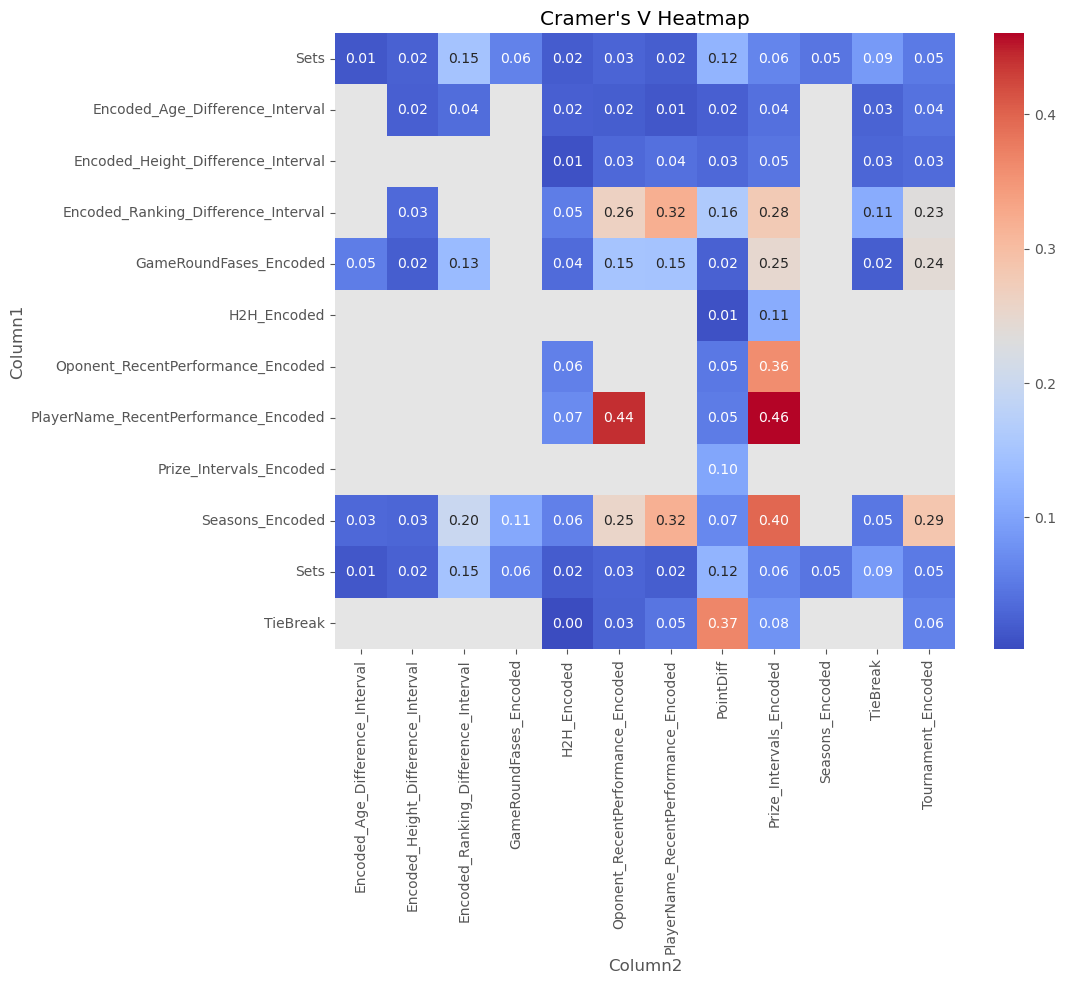

In [14]:
subset_df = df_final[["Sets", "Seasons_Encoded", "GameRoundFases_Encoded", "Encoded_Age_Difference_Interval",
               "Encoded_Ranking_Difference_Interval", "Encoded_Height_Difference_Interval",
               "TieBreak", "Tournament_Encoded","PlayerName_RecentPerformance_Encoded",
                     "Oponent_RecentPerformance_Encoded","H2H_Encoded",
                     "Prize_Intervals_Encoded","PointDiff"]]
cramer_v_values = []
for i in range(len(subset_df.columns)):
    for j in range(i+1, len(subset_df.columns)):
        contingency_table = pd.crosstab(subset_df.iloc[:, i], subset_df.iloc[:, j])
        chi2, _, _, _ = chi2_contingency(contingency_table)
        n = contingency_table.sum().sum()
        phi = np.sqrt(chi2 / n)
        r, k = contingency_table.shape
        cramers_v = phi / np.sqrt(min(r - 1, k - 1))
        cramer_v_values.append((subset_df.columns[i], subset_df.columns[j], cramers_v))
cramer_v_df = pd.DataFrame(cramer_v_values, columns=["Column1", "Column2", "Cramer's V"])
heatmap_data = cramer_v_df.pivot("Column1", "Column2", "Cramer's V")
heatmap_data = heatmap_data.reindex(["Sets"] + list(heatmap_data.index[:-1]))

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Cramer's V Heatmap")
plt.show()

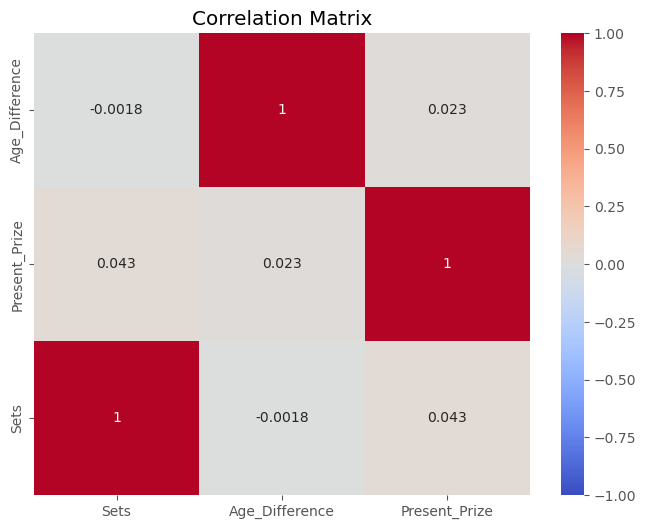

In [15]:
subset_df = df[["Sets", "Age_Difference", "Present_Prize"]]
correlation_matrix = subset_df.corr()
sets_corr = correlation_matrix["Sets"].copy()
correlation_matrix = correlation_matrix.drop("Sets", axis=0)
correlation_matrix = correlation_matrix.append(sets_corr)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()